In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rcpl.config import BASE_DIR, FIGURES_DIR, MPL_RC, CONFIGS_DIR
from rcpl.utils.prediction import ChainPredictor

mpl.rcParams.update(MPL_RC)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
exp_path, e_id = BASE_DIR / 'data/epsp_stress/measured/2023-11-23.json', 1
# exp_path, e_id = BASE_DIR / 'data/epsp_stress/measured/2023-11-07.json', 2

In [4]:
gru_predictor = ChainPredictor(config_path=CONFIGS_DIR / 'maftr/maftr2_4.best/gru.yaml', predicts_scaled_theta=True)
ttopt_predictor = ChainPredictor(config_path=CONFIGS_DIR / 'maftr/maftr2_4.best/ttopt.yaml', predicts_scaled_theta=False)

In [5]:
unscaled_theta_ttopt, stress_pred_ttopt = ttopt_predictor.predict_from_json(exp_path)
unscaled_theta_opt_ttopt, stress_pred_opt_ttopt, _ = ttopt_predictor.predict_from_json_simplex(exp_path)

Origin score: 485.95, Nelder-Mead score: 389.47


In [6]:
pd.DataFrame({
    'parameter': ['$'+i+'$' for i in gru_predictor.chain.dataset_info.value['latex_labels']], 
    'prediction': unscaled_theta_ttopt,
    'prediction after Nelder-Mead': unscaled_theta_opt_ttopt,
})

,parameter,prediction,prediction after Nelder-Mead
0,$k_0$,137.438904,210.636902
1,$\kappa_1$,10000.000000,31074.546875
2,$\kappa_2$,0.015842,0.021304
3,$c_1$,10000.000000,21463.906250
4,$c_2$,2000.000000,2188.314453
5,$c_3$,113.098732,94.121338
6,$c_4$,1076.001953,1228.881348
7,$a_1$,62.365593,64.803833
8,$a_2$,123.949165,141.125336
9,$a_3$,28.347996,0.533082


In [7]:
unscaled_theta_gru, stress_pred_gru = gru_predictor.predict_from_json(exp_path)
unscaled_theta_opt_gru, stress_pred_opt_gru, _ = gru_predictor.predict_from_json_simplex(exp_path, verbose=True)

/home/martin/miniconda3/envs/t2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Origin score: 812.12, Nelder-Mead score: 398.05


In [8]:
pd.DataFrame({
    'parameter': ['$'+i+'$' for i in gru_predictor.chain.dataset_info.value['latex_labels']], 
    'prediction': unscaled_theta_gru,
    'prediction after Nelder-Mead': unscaled_theta_opt_gru,
})

,parameter,prediction,prediction after Nelder-Mead
0,$k_0$,117.659836,195.324219
1,$\kappa_1$,8918.841797,23206.996094
2,$\kappa_2$,0.028482,0.028727
3,$c_1$,11785.776367,31843.533203
4,$c_2$,1483.610962,2539.827637
5,$c_3$,501.896118,424.162659
6,$c_4$,444.734375,410.384888
7,$a_1$,117.625931,67.578262
8,$a_2$,87.029480,138.944458
9,$a_3$,79.739494,16.279949


In [9]:
# validate_crlb = gru_predictor.validate_crlb(exp_path, crop_signal=[0, 681])
epsp, measured_stress = gru_predictor.get_experiment_data(exp_path)

In [10]:
if exp_path.stem == '2023-11-07':
    x_lim = 450

    col0 = '#005500'
    col1 = '#dd0000'
    col2 = '#244BB5'
    lw=.8

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.75, 4), sharex=True, gridspec_kw={'height_ratios': [3, 4, 3], 'hspace': 0.05})

    ax1.plot(epsp[:x_lim], color='#005500', lw=lw)
    ax1.set_xlabel('Samples')
    ax1.set_ylabel('Plastic deformation')
    ax1.set_xlim([-5,5+x_lim])
    # ax1.legend()

    ax2.plot(measured_stress[:x_lim], label='Experimental', color=col0, lw=lw)
    # ax2.plot(measured_stress[:x_lim], '.', color='#005500')
    ax2.plot(stress_pred_opt_ttopt[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax2.plot(stress_pred_opt_gru[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax2.set_ylabel('Stress $S$ (MPa)')
    ax2.legend(ncol=3, loc='lower right')
    ax2.set_ylim([-610, 440])

    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.plot((stress_pred_opt_ttopt.numpy()-np.array(measured_stress))[:x_lim], label='TTOpt (r)', color=col1, lw=lw)
    ax3.plot((stress_pred_opt_gru.numpy()-np.array(measured_stress))[:x_lim], label='GRU (r)', color=col2, lw=lw)
    ax3.set_ylabel('$\\Delta S$ (MPa)')
    ax3.set_xlabel('Samples')
    ax3.legend(loc='upper right', ncol=2)

    plt.savefig(FIGURES_DIR / f'{exp_path.stem}.exp_sim_opt.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()

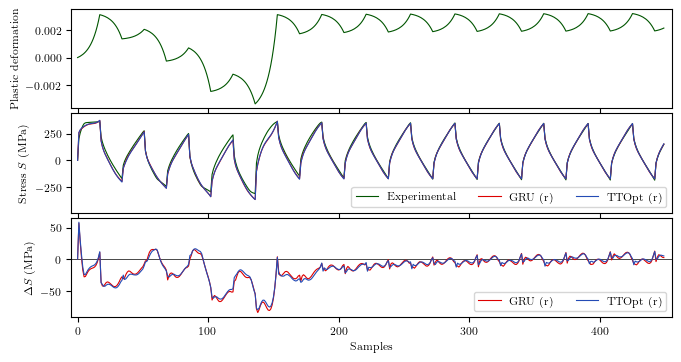

In [13]:
if exp_path.stem == '2023-11-23':
    x_lim = 450
    
    lw = .8
    col0 = '#005500'
    col1 = '#dd0000'
    col2 = '#244BB5'

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.75, 4), sharex=True, gridspec_kw={'height_ratios': [3, 3, 3], 'hspace': 0.05})

    ax1.plot(epsp[:x_lim], color='#005500', lw=lw)
    ax1.set_xlabel('Samples')
    ax1.set_ylabel('Plastic deformation')
    ax1.set_xlim([-5,5+x_lim])
    # ax1.legend()

    ax2.plot(measured_stress[:x_lim], label='Experimental', color=col0, lw=lw)
    # ax2.plot(measured_stress[:x_lim], '.', color='#005500', markersize=1)
    ax2.plot(stress_pred_opt_gru[:x_lim], label='GRU (r)', color=col1, lw=lw)
    ax2.plot(stress_pred_opt_ttopt[:x_lim], label='TTOpt (r)', color=col2, lw=lw)
    ax2.set_ylabel('Stress $S$ (MPa)')
    ax2.legend(ncol=3, loc='lower right')
    ax2.set_ylim([-490, 440])

    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.plot((stress_pred_opt_gru.numpy()-np.array(measured_stress))[:x_lim], label='GRU (r)', color=col1, lw=lw)
    ax3.plot((stress_pred_opt_ttopt.numpy()-np.array(measured_stress))[:x_lim], label='TTOpt (r)', color=col2, lw=lw)
    ax3.set_ylabel('$\\Delta S$ (MPa)')
    ax3.set_xlabel('Samples')
    ax3.legend(ncol=2, loc='lower right')
    
    plt.savefig(FIGURES_DIR / f'{exp_path.stem}.exp_sim_opt.pdf', bbox_inches='tight', pad_inches=0)

    plt.show()